## Import Default packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import COSMIC Packages

In [2]:
import cosmic
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import independent

## Set Initial Binaries parameters

In [3]:
#Setting what evolution types are allowed
final_kstar1 = [10,11,12]
final_kstar2 = [10,11,12]

#Set the initial binary population parameters
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = \
     InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=0.5,
                                primary_model='kroupa01', ecc_model='sana12', porb_model='sana12',
                                qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=100)

print(InitialBinaries)

     kstar_1  kstar_2    mass_1    mass_2          porb       ecc  \
0        1.0      1.0  6.700677  5.887994   2689.635263  0.786425   
1        1.0      1.0  7.149074  5.073977     11.918486  0.159977   
2        1.0      1.0  2.105427  1.131350     30.230572  0.021325   
3        1.0      1.0  2.494980  1.542473      1.538139  0.077810   
4        0.0      0.0  0.636227  0.579040      1.620503  0.006815   
..       ...      ...       ...       ...           ...       ...   
101      1.0      1.0  1.522728  1.147927     36.042124  0.066995   
102      1.0      1.0  2.525579  1.526093      2.065264  0.562318   
103      1.0      0.0  0.827623  0.666940      3.287764  0.199281   
104      1.0      0.0  0.877276  0.555349  87710.843066  0.176500   
105      1.0      1.0  1.079553  0.739644  28954.425822  0.885096   

     metallicity   tphysf   mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0           0.02  13700.0  6.700677  5.887994  ...     0.0     0.0      0.0   
1           0

In [4]:
#Set the BSEDict
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

#Evolve the system
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

print(bcm.iloc[:10])

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1        lum_1     rad_1        teff_1  \
0      0.0      1.0  6.700677  6.700677  1476.787083  3.289618  19816.472842   
0  13700.0     15.0  0.852860  0.000000     0.206287  0.009708  39656.561137   
1      0.0      1.0  7.149074  7.149074  1847.711981  3.416180  20566.376397   
1  13700.0     15.0  1.032710  0.000000     0.384103  0.007688  52057.008538   
2      0.0      1.0  2.105427  2.105427    18.412763  1.727293   9138.319143   
2  13700.0     11.0  0.562709  0.562709     0.000004  0.013294   2212.050837   
3      0.0      1.0  2.494980  2.494980    36.855220  1.884922  10405.134468   
3  13700.0     11.0  0.794267  0.794267     0.000005  0.010377   2625.993497   
4      0.0      0.0  0.636227  0.636227     0.078384  0.592291   3986.201071   
4  13700.0      0.0  0.636227  0.636227     0.090434  0.617132   4047.282675   

    massc_1    radc_1        menv_1  ...         porb          sep       ecc  \
0  0.000000  0.000000  1.000000e-10  ..

In [5]:
#print(bpp.iloc[:10])

## Get all parameters wanted/needed
## (mass1, mass2, period, ecc, semi-major(a), sini, rv_variability)
### sini is not calculated so create artificial data

In [6]:
mass1 = bcm.mass_1[bcm.tphys == 13700.0]
#print(mass1)
mass2 = bcm.mass_2[bcm.tphys == 13700.0]
#print(mass2)
period = bcm.porb[bcm.tphys == 13700.0]
#print(period)
ecc = bcm.ecc[bcm.tphys == 13700.0]
#print(ecc)
a = bcm.sep[bcm.tphys == 13700.0]
#print(a)

In [7]:
#Checking to make sure all initial dataframes are the 
#same length
print(len(mass1))
print(len(mass2))
print(len(period))
print(len(ecc))
print(len(a))

106
106
106
106
106


In [8]:
#Create artificial sini data
sin_i = np.random.uniform(0, 1, len(mass1))
print(len(sin_i))

106


In [9]:
#Define rv_variability function
def rv_variable(m1, m2, a, period, ecc, sin_i):
    """
    Function to calculate readial velocity variability
    
    m1: Mass 1
    m2: Mass 2
    period: Period
    ecc: Eccentricity
    a: amplitude
    """
    var = (2*np.pi*a*m2*sin_i)/(period*(m1+m2)*(1-ecc**2)**(1/2))
    return var

## Problems occur past here:
1.Periods of 0 and -1 and inf

2.Semi-major axis(a) of 0 and -1

3.Eccentricity of -1

4.Might be hidden 'inf' values

5.Check to make sure all rv_var values are positive and non-zero

In [10]:
#Here you can manually check
#What values you'd want to remove
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(ecc)

0     -1.000000e+00
1     -1.000000e+00
2     -1.000000e+00
3     -1.000000e+00
4      6.739786e-03
5     -1.000000e+00
6      0.000000e+00
7      2.044424e-01
8      2.944761e-01
9      1.078579e-01
10    -1.000000e+00
11    -1.000000e+00
12    -1.000000e+00
13     0.000000e+00
14     2.748864e-02
15     0.000000e+00
16    -1.000000e+00
17     1.596562e-02
18     0.000000e+00
19    -1.000000e+00
20     1.313759e-01
21    -1.000000e+00
22     0.000000e+00
23     5.316353e-01
24    -1.000000e+00
25     7.956641e-01
26    -1.000000e+00
27    -1.000000e+00
28     9.455191e-02
29     0.000000e+00
30    -1.000000e+00
31    -1.000000e+00
32     0.000000e+00
33     1.909385e-01
34    -1.000000e+00
35     2.737307e-02
36     8.212627e-01
37    -1.000000e+00
38    -1.000000e+00
39    -1.000000e+00
40     8.569133e-02
41     0.000000e+00
42     2.819715e-01
43    -1.000000e+00
44     1.225823e-03
45     5.452839e-02
46     0.000000e+00
47     9.575752e-02
48     2.335623e-02
49    -1.000000e+00


In [11]:
p = period[period != 0]
p = p[p != -1]
p = p[p != np.inf]
print(len(p))

53


In [12]:
semi = a[a != 0]
semi = semi[semi != -1]
print(len(semi))

55


In [13]:
e = ecc[ecc != -1]
print(len(e))

59


## Now we have new filtered dataframes:
 But they are different lengths so can't pass through function, so must make them all the same length
 Find the indecies of all unwanted values to remove

## Possible dummy stupid simple method

In [14]:
#period indecies
x = period.index[period == 0]
y = period.index[period == -1]
z = period.index[period == np.inf]

#Update del_arr
del_arr = x
del_arr = del_arr.append(y)
del_arr = del_arr.append(z)
print(del_arr)

#Semi major indecies
x_2 = a.index[a == 0]
y_2 = a.index[a == -1]

#Update del_arr
del_arr = del_arr.append(x_2)
del_arr = del_arr.append(y_2)
print(del_arr)

#Ecc indecies
x_3 = ecc.index[ecc == -1]

#Update del_arr
del_arr = del_arr.append(x_3)
print(del_arr)

#Create final array and remove dupplicates
delete_arr=[]
for i in del_arr:
    if i not in delete_arr:
        delete_arr.append(i)

Int64Index([  0,   1,   2,   3,  10,  11,  12,  16,  19,  21,  24,  26,  27,
             30,  31,  34,  37,  38,  39,  43,  49,  50,  51,  53,  55,  57,
             58,  59,  61,  62,  63,  65,  66,  74,  75,  76,  77,  80,  91,
             93,  95,  96, 101, 102,   5,   6,  54,  67,  69,  73,  98,  32,
             92],
           dtype='int64')
Int64Index([  0,   1,   2,   3,  10,  11,  12,  16,  19,  21,
            ...
             96, 101, 102,   5,   6,  54,  67,  69,  73,  98],
           dtype='int64', length=104)
Int64Index([  0,   1,   2,   3,  10,  11,  12,  16,  19,  21,
            ...
             75,  76,  77,  80,  91,  93,  95,  96, 101, 102],
           dtype='int64', length=151)


In [15]:
print(del_arr)
print(delete_arr)

Int64Index([  0,   1,   2,   3,  10,  11,  12,  16,  19,  21,
            ...
             75,  76,  77,  80,  91,  93,  95,  96, 101, 102],
           dtype='int64', length=151)
[0, 1, 2, 3, 10, 11, 12, 16, 19, 21, 24, 26, 27, 30, 31, 34, 37, 38, 39, 43, 49, 50, 51, 53, 55, 57, 58, 59, 61, 62, 63, 65, 66, 74, 75, 76, 77, 80, 91, 93, 95, 96, 101, 102, 5, 6, 54, 67, 69, 73, 98, 32, 92]


In [22]:
test2 = []
for i in range(len(ecc)):
    if ecc.index[i] not in delete_arr:
        test2.append(ecc[i])
test3 = []
for i in range(len(period)):
    if period.index[i] not in delete_arr:
        test3.append(period[i])
test4 = []
for i in range(len(a)):
    if a.index[i] not in delete_arr:
        test4.append(a[i])

test2 = pd.DataFrame(test2)
test3 = pd.DataFrame(test3)
test4 = pd.DataFrame(test4)
    
print(test2)
print(test3)
print(test4)

               0
0   6.739786e-03
1   2.044424e-01
2   2.944761e-01
3   1.078579e-01
4   0.000000e+00
5   2.748864e-02
6   0.000000e+00
7   1.596562e-02
8   0.000000e+00
9   1.313759e-01
10  0.000000e+00
11  5.316353e-01
12  7.956641e-01
13  9.455191e-02
14  0.000000e+00
15  1.909385e-01
16  2.737307e-02
17  8.212627e-01
18  8.569133e-02
19  0.000000e+00
20  2.819715e-01
21  1.225823e-03
22  5.452839e-02
23  0.000000e+00
24  9.575752e-02
25  2.335623e-02
26  0.000000e+00
27  7.141216e-01
28  6.568018e-01
29  0.000000e+00
30  2.192148e-03
31  3.139608e-01
32  0.000000e+00
33  1.906373e-01
34  1.027888e-01
35  3.480796e-01
36  1.079398e-01
37  1.011053e-01
38  8.998086e-01
39  2.397779e-02
40  0.000000e+00
41  1.797018e-01
42  7.285770e-01
43  3.542388e-01
44  0.000000e+00
45  3.416157e-03
46  1.074172e-01
47  1.182217e-02
48  1.647676e-01
49  0.000000e+00
50  8.756421e-08
51  1.764998e-01
52  1.141945e-01
               0
0   1.603502e+00
1   1.849279e+02
2   7.102206e+03
3   6.530092e+

In [23]:
print(len(test2), len(test3), len(test4))

53 53 53


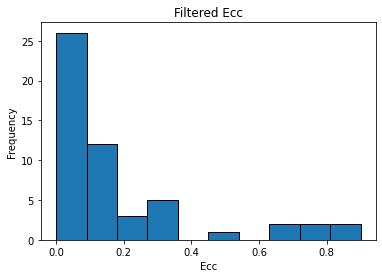

In [24]:
test2.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Filtered Ecc')
plt.xlabel('Ecc')
plt.show()

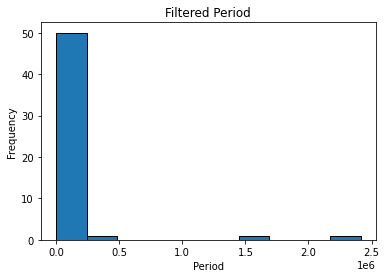

In [25]:
test3.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Filtered Period')
plt.xlabel('Period')
plt.show()

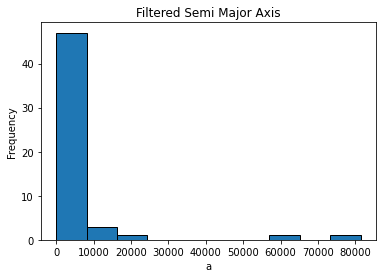

In [26]:
test4.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Filtered Semi Major Axis')
plt.xlabel('a')
plt.show()